<a href="https://colab.research.google.com/github/PippleNL/DSMediorSligro/blob/main/TimeSeriesAnalysisBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to the basics of time series analysis in Python

## Python's datetime

In [4]:
from datetime import datetime
date_time = datetime(year=2022, month=8, day=14, second=12)

In [5]:
date_time.second

12

## Numpys datetime

In [12]:
import numpy as np
np.array(['2022-08-14', '1995-10-01', '2007-12-01'], dtype = 'datetime64')

array(['2022-08-14', '1995-10-01', '2007-12-01'], dtype='datetime64[D]')

In [10]:
np.array(['2022-08-14', '1995-10-01', '2007-12-01'], dtype = 'datetime64[s]')

array(['2022-08-14T00:00:00', '1995-10-01T00:00:00',
       '2007-12-01T00:00:00'], dtype='datetime64[s]')

In [14]:
np.arange('1995-10-01', '2022-10-13', 7, dtype = 'datetime64[D]')

array(['1995-10-01', '1995-10-08', '1995-10-15', ..., '2022-09-25',
       '2022-10-02', '2022-10-09'], dtype='datetime64[D]')

## Pandas datetime

In [15]:
import pandas as pd

In [19]:
pd.date_range('1995-10-01', periods=100, freq='D')

DatetimeIndex(['1995-10-01', '1995-10-02', '1995-10-03', '1995-10-04',
               '1995-10-05', '1995-10-06', '1995-10-07', '1995-10-08',
               '1995-10-09', '1995-10-10', '1995-10-11', '1995-10-12',
               '1995-10-13', '1995-10-14', '1995-10-15', '1995-10-16',
               '1995-10-17', '1995-10-18', '1995-10-19', '1995-10-20',
               '1995-10-21', '1995-10-22', '1995-10-23', '1995-10-24',
               '1995-10-25', '1995-10-26', '1995-10-27', '1995-10-28',
               '1995-10-29', '1995-10-30', '1995-10-31', '1995-11-01',
               '1995-11-02', '1995-11-03', '1995-11-04', '1995-11-05',
               '1995-11-06', '1995-11-07', '1995-11-08', '1995-11-09',
               '1995-11-10', '1995-11-11', '1995-11-12', '1995-11-13',
               '1995-11-14', '1995-11-15', '1995-11-16', '1995-11-17',
               '1995-11-18', '1995-11-19', '1995-11-20', '1995-11-21',
               '1995-11-22', '1995-11-23', '1995-11-24', '1995-11-25',
      

In [27]:
pd.to_datetime('12=1-2018', format = '%m=%d-%Y')

Timestamp('2018-12-01 00:00:00')

# Time resampling

In [35]:
url = 'https://raw.githubusercontent.com/PippleNL/DSMediorSligro/main/data/starbucks.csv'
df = pd.read_csv(url, index_col='Date', parse_dates=True)
df.head(5)

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [39]:
df['Close'].resample(rule='A').sum()

Date
2015-12-31    12619.6811
2016-12-31    13580.7164
2017-12-31    13919.7849
2018-12-31    14274.3712
Freq: A-DEC, Name: Close, dtype: float64

In [41]:
def first_day(entry):
  if len(entry):
    return entry[0]

df.resample(rule='AS').apply(first_day)

,Close,Volume
Date,,
2015-01-01,38.0061,6906098
2016-01-01,55.0780,13521544
2017-01-01,53.1100,7809307
2018-01-01,56.3243,7215978


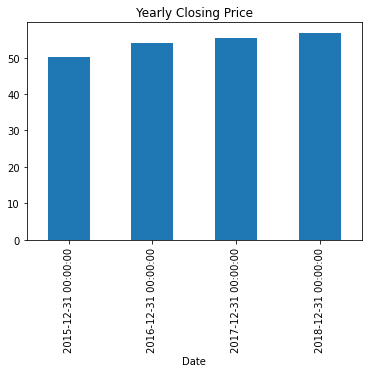

In [43]:
df['Close'].resample('A').mean().plot.bar(title='Yearly Closing Price')

## Time Shifting

In [46]:
df['Close'].shift(periods=3, freq='M')

Date
2015-03-31    38.0061
2015-03-31    37.2781
2015-03-31    36.9748
2015-03-31    37.8848
2015-03-31    38.4961
               ...   
2019-02-28    60.5600
2019-02-28    63.0800
2019-02-28    63.2000
2019-02-28    63.3900
2019-03-31    64.4000
Name: Close, Length: 1006, dtype: float64

## Rolling windows

In [48]:
df.rolling(window=3).mean()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,37.419667,8.731411e+06
2015-01-07,37.379233,9.673563e+06
2015-01-08,37.785233,1.018915e+07
...,...,...
2018-12-24,61.366667,1.670435e+07
2018-12-26,61.676667,1.549813e+07
2018-12-27,62.280000,1.142586e+07


In [52]:
df['Close'].expanding(min_periods=3).sum()

Date
2015-01-02           NaN
2015-01-05           NaN
2015-01-06      112.2590
2015-01-07      150.1438
2015-01-08      188.6399
                 ...    
2018-12-24    54140.4836
2018-12-26    54203.5636
2018-12-27    54266.7636
2018-12-28    54330.1536
2018-12-31    54394.5536
Name: Close, Length: 1006, dtype: float64